# Dogs Breeds Dataset

## Description

This notebook provides a simple data characterization of the training data provided in Dog Breeds Dataset.

This is an important step in the ML process to undestand the data used to train our model. It's in here where we can observe some intrinsic data characteristics that guide our deicision for the rest of the training procedure. 

In [1]:
# Imports come here
import os
from collections import Counter, OrderedDict

import numpy as np
import torch
from matplotlib import pyplot as plt
from skimage import io
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import (Compose, Normalize, RandomHorizontalFlip,
                                    RandomResizedCrop, RandomRotation,
                                    ToTensor, functional as F)
from torchvision.utils import make_grid
from tqdm import tqdm

%matplotlib inline

In [2]:
transforms = Compose([
    RandomResizedCrop(224),
    RandomHorizontalFlip(),
    RandomRotation(15),
    ToTensor(),        
    Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [3]:
def sanitize(classname):
    return classname[10:].lower().replace('_', ' ').capitalize()

In [4]:
data = ImageFolder('./data/dogs/train', transform=transforms)

In [5]:
data.classes = [sanitize(classname) for classname in data.classes]
data.classes

['Chihuahua',
 'Japanese spaniel',
 'Maltese dog',
 'Pekinese',
 'Shih-tzu',
 'Blenheim spaniel',
 'Papillon',
 'Toy terrier',
 'Afghan hound',
 'Basset',
 'Beagle',
 'Bloodhound',
 'Bluetick',
 'Black-and-tan coonhound',
 'Walker hound',
 'English foxhound',
 'Borzoi',
 'Irish wolfhound',
 'Italian greyhound',
 'Whippet',
 'Ibizan hound',
 'Norwegian elkhound',
 'Otterhound',
 'Saluki',
 'Weimaraner',
 'Staffordshire bullterrier',
 'American staffordshire terrier',
 'Bedlington terrier',
 'Border terrier',
 'Irish terrier',
 'Norfolk terrier',
 'Yorkshire terrier',
 'Wire-haired fox terrier',
 'Lakeland terrier',
 'Sealyham terrier',
 'Airedale',
 'Cairn',
 'Dandie dinmont',
 'Boston bull',
 'Giant schnauzer',
 'Standard schnauzer',
 'Scotch terrier',
 'Tibetan terrier',
 'Silky terrier',
 'Soft-coated wheaten terrier',
 'Lhasa',
 'Flat-coated retriever',
 'Labrador retriever',
 'Chesapeake bay retriever',
 'German short-haired pointer',
 'Vizsla',
 'English setter',
 'Irish setter',


In [6]:
class_to_idx_dict = {k: v for v, k in enumerate(data.classes)}
idx_to_class_dict = {v: k for k, v in class_to_idx_dict.items()}

In [7]:
def class_to_idx(classname):
    return class_to_idx_dict[classname]

def idx_to_class(idx):
    return idx_to_class_dict[idx]

In [8]:
data.target_transforms = Compose([
    idx_to_class,
    sanitize,
    class_to_idx
])

## Cheking class distributions

An unbalanced dataset can become extremlly challenging to properly train and identify unbalacement early can be very helpful to save time trying to tune a ML model when the problem is in the data.

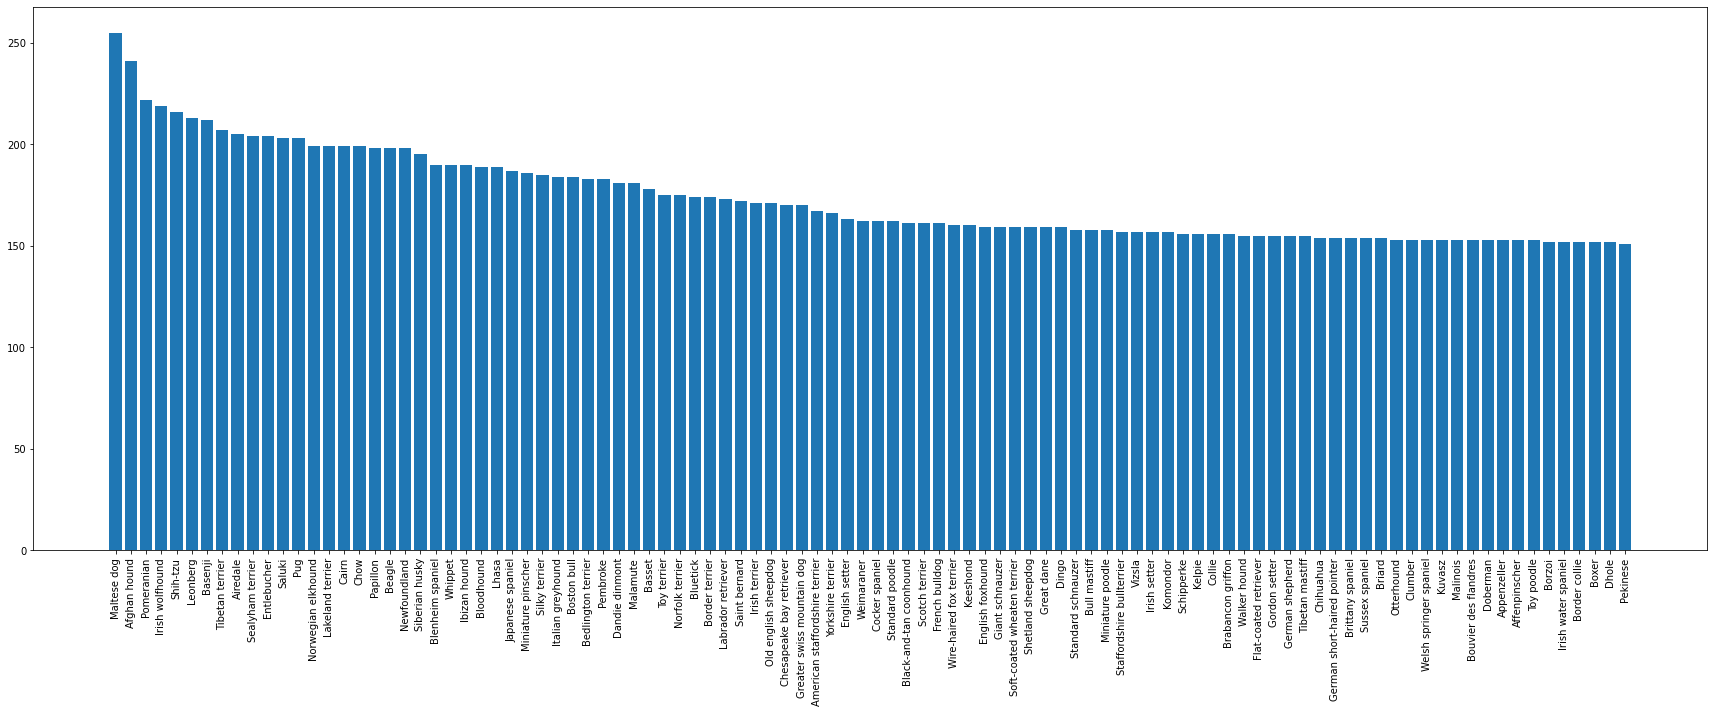

In [9]:
breed_counts = OrderedDict(Counter(data.targets).most_common())

_, ax = plt.subplots(figsize=(30, 10))
plt.bar([idx_to_class_dict[breed] for breed in breed_counts.keys()], breed_counts.values())

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

In [11]:
counts = np.array(list(breed_counts.values()))

print(f'Min:\t{np.min(counts)}')
print(f'Mean:\t{np.mean(counts)}')
print(f'Std:\t{np.std(counts)}')
print(f'Max:\t{np.max(counts)}')

Min:	151
Mean:	173.45
Std:	22.307565981074674
Max:	255


As we can observe, the **Maltese dog** and some other breeds have more instances than 1 standard deviation from the data's mean. At first this might not be a problem. However, it's good to keep an eyes during the training procedure to check if these classes are dominating the others.

## Verifying image data

Now that we know some structural characteristics from our dataset, let's analyse the image data itself.

In [12]:
loader = DataLoader(data, shuffle=True, batch_size=16)

In [13]:
imgs, _ = iter(loader).next()
imgs.size()

torch.Size([16, 3, 224, 224])

In [14]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

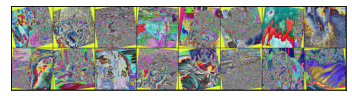

In [15]:
grid = make_grid(imgs)
show(grid)

As we can observe, some images are just zeroed tensors. Thus, in order to improve our dataset quality, let's remove these images from the folder to facilitate future image loadings.

In [16]:
removed = 0
for root, dirs, files in os.walk('./data/dogs/'):
    if len(dirs) == 0:
        for f in tqdm(files):
            imgpath = os.path.join(root, f)
            img = io.imread(imgpath)
            if np.count_nonzero(img) == 0:
                os.remove(imgpath)
                removed += 1

print(f'\nRemoved {removed} invalid images.')

100%|██████████| 152/152 [00:01<00:00, 92.24it/s]
Removed 248 invalid images.



In [17]:
data = ImageFolder('./data/dogs/train', transform=transforms)
loader = DataLoader(data, shuffle=True, batch_size=16)
samples, _ = iter(loader).next()

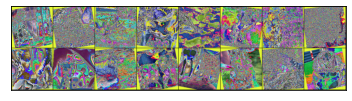

In [18]:
grid = make_grid(samples)
show(grid)